<a href="https://colab.research.google.com/github/strlla4536/Deeplearning-Python/blob/main/%ED%95%A8%EC%88%98_%EA%B3%84%EC%88%98_%EC%B6%94%EC%A0%95%ED%95%98%EA%B8%B0_%EC%97%AD%ED%96%89%EB%A0%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#y=2+x+2x^2  ,(-1,1)  
* np.linspace(start.stop,num) ; start와 stop 사이를 num 등분
* np.random.normal(E,V,n) ; 랜덤으로 n개 (E=평균, V=분산)(V 클수록 더 마구잡이로 잡음 생김)

* ax^2+bx+c 인 상황에서 a,b,c 구하기

-1.0 1.0
0.9797979797979799


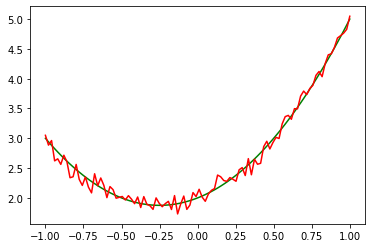

(array([2.01285684, 1.02308362, 1.95458071]), array([0.89438346]), 3, array([10.61129108,  5.8315293 ,  2.86600227]))
[2.01285684 1.02308362 1.95458071]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ngae=100
xp=np.linspace(-1,1,ngae)    #x의 interval들(x의 point들 :xp), linspace : 간격 나눔

ff=2+xp+2*xp**2  #찾아야하는 값 (답)

fn=ff+np.random.normal(0,0.1,100)    
    #실제로 관측한 값 ; 100개의 점에서 random number를 ff에 더함=잡음 추가
plt.figure()
plt.plot(xp,ff,'g')   
plt.plot(xp,fn,'r')   
plt.show()

(array([2.01285684, 1.02308362, 1.95458071]), array([0.89438346]), 3, array([10.61129108,  5.8315293 ,  2.86600227]))
[2.01285684 1.02308362 1.95458071]
[2.01831933 0.98113266 1.88785797]
Relative l2err= 0.018075507245884727


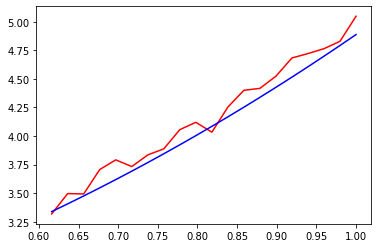

In [ ]:
#ax^2+bx+c 인 상황에서 a,b,c 구하기

norb=80  #80개로 training

aa=np.zeros((ngae,3))   #aa라는 matrix를 100*3이라고 구성하려 함
bb=np.zeros(ngae)  

for ig in range(ngae):
  aa[ig,0]=1 #c는 상수항이니까 aa의 1열의 값들이 다 1
  aa[ig,1]=xp[ig]
  aa[ig,2]=xp[ig]**2
  bb[ig]=fn[ig]

yy=np.linalg.lstsq(aa,bb,rcond=None)   #최소자승의 해..
print(yy)
print(yy[0])   
#100개라는 충분한 관측값이 나왓기때문에 잡음에도 불구하고 구하려는거랑 비슷한 값 얻었


yp=np.linalg.lstsq(aa[:norb,:],bb[:norb ],rcond=None)   #solve 부분 
#aa 행렬 중 행은 norb까지(0부터79까지), 열은 처음부터 끝까지
print(yp[0])

#predict
prdt_val=np.matmul(aa[norb:,:],yp[0])
l2err=np.sqrt(np.dot(prdt_val-ff[norb:],prdt_val-ff[norb:]))

bj=np.sqrt(np.dot(prdt_val-ff[norb:],prdt_val-ff[norb:]))  #RMSE : 내적으로 오차 구함; <f(실제) - p(예측), f-p>
bm=np.sqrt(np.dot(ff[norb:],ff[norb:]))#정확한 값
print('Relative l2err=',bj/bm)#비율 이용해서 정확도 측정함

plt.figure()
plt.plot(xp[norb:],bb[norb:], 'r')
plt.plot(xp[norb:],prdt_val, 'b')
plt.show()

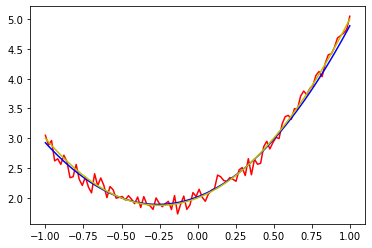

In [ ]:
#전체 범위를 보자
prdt_all=np.matmul(aa[:,:],yp[0])  
plt.figure()
plt.plot(xp[:],bb[:],'r')  #관측(측정)한 것
plt.plot(xp[:],prdt_all,'b')    #예측한것 (구한 것)
plt.plot(xp[:],ff,'y')       #실제값
plt.show()
#구한 값이 잘 맞는것같음 (b,y 차이 거의 없음)

#4차함수 : y=2 + xp + 2xp^2 + 5xp^3 + 3xp^4   에 적용

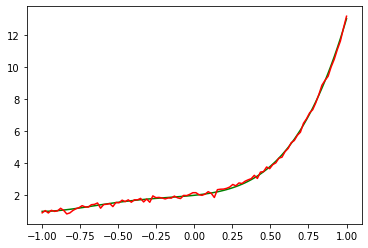

(array([2.03463912, 1.0435652 , 1.83110593, 4.94022471, 3.10303555]), array([1.11854827]), 5, array([10.8811134 ,  6.88705962,  3.75421554,  1.3184082 ,  0.58960384]))
[2.03463912 1.0435652  1.83110593 4.94022471 3.10303555]
[2.03235389 1.21729697 1.99881367 4.19802285 2.3182072 ]
2.9638386586567673


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ngae=100
xp=np.linspace(-1,1,ngae)

ff=2+xp+2*xp**2+5*xp**3+3*xp**4   

fn=ff+np.random.normal(0,0.1,100) 
plt.figure()
plt.plot(xp,ff,'g')   
plt.plot(xp,fn,'r')  
plt.show()

aa=np.zeros((ngae,5))   
bb=np.zeros(ngae)   
for ig in range(ngae):
  aa[ig,0]=1 
  aa[ig,1]=xp[ig]
  aa[ig,2]=xp[ig]**2
  aa[ig,3]=xp[ig]**3
  aa[ig,4]=xp[ig]**4
  bb[ig]=fn[ig]

yy=np.linalg.lstsq(aa,bb,rcond=None)  
print(yy)
print(yy[0])   

norb=80  
yp=np.linalg.lstsq(aa[:norb,:],bb[:norb ],rcond=None)
print(yp[0])

prdt_val=np.matmul(aa[norb:,:],yp[0])
l2err=np.sqrt(np.dot(prdt_val-ff[norb:],prdt_val-ff[norb:]))
print(l2err)  

#반복해서 해 찾기 - gradient

f = 2x^2+x+2 의 최소가 되는 x 구하기

In [ ]:
xn=1
alp=0.01   
for et in range(500):  
  xn=xn-alp*(4*xn+1)
  print('it_num',et,'sol=',xn)

#해 -1/4인 것 알고 있음
#stepsize alpha를 뭘로한느지.= 얼만큼 앞으로 전진할 것인지
#미분함수를 아니까 4xn+1이라고 했지만 모르면 계산도 해줘야함
#잡음도 안들어가있어서 안정적으로 가는것처럼 보임. 해의 변화 없음
#gradient가 거의 0에서 멈췃다는것은 잘 구했다는 뜻


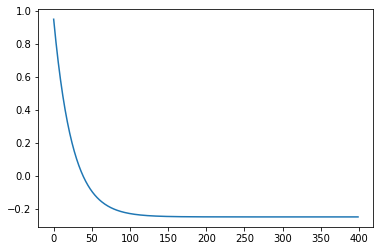

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xn = 1
alp = 0.01
nbun = 400 
acc = np.zeros(nbun)    #acc = accuracy
for et in range(nbun):
  xn = xn-alp*(4*xn+1)
  acc[et] = xn  #xn이라는게 어떻게 변하는지 넣기

plt.figure()
plt.plot(acc)
#(x값이 증가할수록)1부터 점점 작아져서 (-)값까지

gradient 구해서 반복적으로 해 구해가는 루틴. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ngae = 100
xx=np.linspace(-1,1,ngae)
ff = 2+xx+2*xx**2
ffn = ff+np.random.normal(0,0.1,ngae)
nov = 80
aa = np.zeros((ngae,3))
bb=np.zeros(ngae)
for ig in range(ngae):
  aa[ig,0]=xx[ig]**2
  aa[ig,1]=xx[ig]
  aa[ig,2]=1
  bb[ig]=ffn[ig]

#normal matrix(정규행렬) an, bn
an = np.matmul(np.transpose(aa[:nov,:]),aa[:nov,:]) #원래 aa 100*3행렬이라 an은 3*3 행렬됨
bn = np.matmul(np.transpose(aa[:nov,:]),bb[:nov]) #bn은 벡터 3개만 남음
alp = 0.005  
#alpha 값 잘못 설정하면 해가 발산할 수 있음(특히 잡음이 많을 때). 매우 조심해야함.그래서 보통 작게 시작(경험적으로)
nbun = 500
xn = [3,3,3]
for et in range(nbun):
  xn = xn-alp*(np.matmul(an,xn)-bn)

print('sol=',xn)   #우리가 구한 solution

prdt = np.matmul(aa[:,:],xn)
plt.figure()
plt.plot(xx[:],bb[:],'r')
plt.plot(xx[:],prdt,'b')
plt.plot(xx[:],ff,'y')
plt.show()